Тестовое задание на позицию "Ведущий аналитик" для отбора в команду Наукометрического центра НИУ-ВШЗ

Выполнил Рожков Александр

Содержание :

- [Загрузка библиотек](#Загрузка-библиотек)
- [I. Фракционный учет](#I.-Фракционный-учет)
  - [A. Первая статья](#A.-Первая-статья)
  - [A. Вторая статья](#A.-Вторая-статья)
  - [A. Третья статья](#A.-Третья-статья)
  - [B. Сводная таблица](#B.-Сводная-таблица)
  
- [II. SJR](#II.-SJR)
 
  - [A.  Максимум за 2016 год](#A.-Максимум-за-2016-год)
  - [B. SJR журнала "Nature Medicine" за 2021](#B.-SJR-журнала-"Nature-Medicine"-за-2021)
  - [C. Выводы из SJR](#C.-Выводы-из-SJR)
- [III. Визуализация](#III.-Визуализация)
- [IV. Журналы](#IV.-Журналы)

# Загрузка библиотек

In [6]:
from diophila import OpenAlex
import pandas as pd
import requests
from bs4 import BeautifulSoup
import json
import matplotlib.pyplot as plt

# I. Фракционный учет

Далее предаставлен код, который использует API OpenAlex, выводя авторов статей и их аффилиации, а также количество цитрований статей и долевой подсчет для организаций  

### A. Первая статья

In [7]:
# Инициализация OpenAlex
openalex = OpenAlex("rozhkov1922@gmail.com")

# DOI статьи
doi = 'https://doi.org/10.1016/j.omega.2022.102635'

# Получаем данные о статье
work = openalex.get_single_work(f'https://doi.org/{doi}')

# Получаем общее количество цитирований
citation_count = work.get('cited_by_count', 0)

# Получаем список авторов
authorships = work.get('authorships', [])
total_authors = len(authorships)

# ID НИУ ВШЭ в OpenAlex
hse_id = 'https://openalex.org/I118501908'
hse_fraction = 0.0  # общая доля НИУ ВШЭ

print("Авторы статьи и их аффилиации:\n")

for idx, author in enumerate(authorships, start=1):
    author_name = author.get('author', {}).get('display_name', 'Нет данных')
    institutions = author.get('institutions', [])
    affiliation_names = ', '.join([inst.get('display_name', 'Нет данных') for inst in institutions])

    # расчёт доли этого автора
    author_share = 1 / total_authors
    institution_count = len(institutions)

    if institution_count > 0:
        for inst in institutions:
            if inst.get('id') == hse_id:
                hse_fraction += author_share / institution_count

    print(f"{idx}. {author_name} ({affiliation_names})")

# расчёт доли цитирований НИУ ВШЭ
hse_citations = citation_count * hse_fraction

print(f"\nСтатья с DOI {doi} была процитирована {citation_count} раз(а).")
print(f"Доля статьи, приходящаяся на НИУ ВШЭ: {hse_fraction:.4f}")
print(f"Цитирований, приходящихся на НИУ ВШЭ (по фракционному методу): {hse_citations:.2f}")


Авторы статьи и их аффилиации:

1. Maxim Rozhkov (National Research University Higher School of Economics)
2. Dmitry Ivanov (Berlin School of Economics and Law)
3. Jennifer Blackhurst (University of Iowa)
4. Anand Nair (Michigan State University)

Статья с DOI https://doi.org/10.1016/j.omega.2022.102635 была процитирована 141 раз(а).
Доля статьи, приходящаяся на НИУ ВШЭ: 0.2500
Цитирований, приходящихся на НИУ ВШЭ (по фракционному методу): 35.25


### A. Вторая статья

In [8]:
# Инициализация OpenAlex
openalex = OpenAlex("rozhkov1922@gmail.com")

# DOI статьи
doi = 'https://doi.org/10.1080/1369183X.2020.1853902'

# Получаем данные о статье
work = openalex.get_single_work(f'https://doi.org/{doi}')

# Получаем общее количество цитирований
citation_count = work.get('cited_by_count', 0)

# Получаем список авторов
authorships = work.get('authorships', [])
total_authors = len(authorships)

# ID НИУ ВШЭ в OpenAlex
hse_id = 'https://openalex.org/I118501908'
hse_fraction = 0.0  # общая доля НИУ ВШЭ

print("Авторы статьи и их аффилиации:\n")

for idx, author in enumerate(authorships, start=1):
    author_name = author.get('author', {}).get('display_name', 'Нет данных')
    institutions = author.get('institutions', [])
    affiliation_names = ', '.join([inst.get('display_name', 'Нет данных') for inst in institutions])

    # расчёт доли этого автора
    author_share = 1 / total_authors
    institution_count = len(institutions)

    if institution_count > 0:
        for inst in institutions:
            if inst.get('id') == hse_id:
                hse_fraction += author_share / institution_count

    print(f"{idx}. {author_name} ({affiliation_names})")

# расчёт доли цитирований НИУ ВШЭ
hse_citations = citation_count * hse_fraction

print(f"\nСтатья с DOI {doi} была процитирована {citation_count} раз(а).")
print(f"Доля статьи, приходящаяся на НИУ ВШЭ: {hse_fraction:.4f}")
print(f"Цитирований, приходящихся на НИУ ВШЭ (по фракционному методу): {hse_citations:.2f}")


Авторы статьи и их аффилиации:

1. Swen Hutter (WZB Berlin Social Science Center, Freie Universität Berlin)
2. Hanspeter Kriesi (European University Institute, National Research University Higher School of Economics)

Статья с DOI https://doi.org/10.1080/1369183X.2020.1853902 была процитирована 114 раз(а).
Доля статьи, приходящаяся на НИУ ВШЭ: 0.2500
Цитирований, приходящихся на НИУ ВШЭ (по фракционному методу): 28.50


### A. Третья статья

In [9]:
# Инициализация OpenAlex
openalex = OpenAlex("rozhkov1922@gmail.com")

# DOI статьи
doi = 'https://doi.org/10.1016/j.eswa.2021.116021'

# Получаем данные о статье
work = openalex.get_single_work(f'https://doi.org/{doi}')

# Получаем общее количество цитирований
citation_count = work.get('cited_by_count', 0)

# Получаем список авторов
authorships = work.get('authorships', [])
total_authors = len(authorships)

# ID НИУ ВШЭ в OpenAlex
hse_id = 'https://openalex.org/I118501908'
hse_fraction = 0.0  # общая доля НИУ ВШЭ

print("Авторы статьи и их аффилиации:\n")

for idx, author in enumerate(authorships, start=1):
    author_name = author.get('author', {}).get('display_name', 'Нет данных')
    institutions = author.get('institutions', [])
    affiliation_names = ', '.join([inst.get('display_name', 'Нет данных') for inst in institutions])

    # расчёт доли этого автора
    author_share = 1 / total_authors
    institution_count = len(institutions)

    if institution_count > 0:
        for inst in institutions:
            if inst.get('id') == hse_id:
                hse_fraction += author_share / institution_count

    print(f"{idx}. {author_name} ({affiliation_names})")

# расчёт доли цитирований НИУ ВШЭ
hse_citations = citation_count * hse_fraction

print(f"\nСтатья с DOI {doi} была процитирована {citation_count} раз(а).")
print(f"Доля статьи, приходящаяся на НИУ ВШЭ: {hse_fraction:.4f}")
print(f"Цитирований, приходящихся на НИУ ВШЭ (по фракционному методу): {hse_citations:.2f}")

Авторы статьи и их аффилиации:

1. Hashem Omrani (Urmia University of Technology)
2. Arash Alizadeh (University of Missouri)
3. Ali Emrouznejad (National Research University Higher School of Economics, Aston University)
4. Тамара Теплова (National Research University Higher School of Economics)

Статья с DOI https://doi.org/10.1016/j.eswa.2021.116021 была процитирована 36 раз(а).
Доля статьи, приходящаяся на НИУ ВШЭ: 0.3750
Цитирований, приходящихся на НИУ ВШЭ (по фракционному методу): 13.50


### B. Сводная таблица

Код выводит сводную таблицу. Чтобы не дожидаться выгрузку итоговой таблицы, я прикрепил ее вместе с блакнотом

In [ ]:
# Настройки
HSE_ID = 'https://openalex.org/I118501908'
API_URL = 'https://api.openalex.org/works?filter=institutions.id:I118501908&per-page=100&cursor=*'

# Подготовка
results = []
cursor = '*'
headers = {'User-Agent': 'mailto:rozhkov1922@gmail.com'}

# Получаем данные по страницам (курсор)
while True:
    response = requests.get(f"https://api.openalex.org/works?filter=institutions.id:I118501908&per-page=100&cursor={cursor}", headers=headers)
    data = response.json()

    for work in data['results']:
        work_id = work.get('id', '')
        title = work.get('title', '')
        year = work.get('publication_year', '')
        cited_by = work.get('cited_by_count', 0)
        authorships = work.get('authorships', [])
        total_authors = len(authorships)

        hse_share = 0.0

        # Фракционный учет
        for author in authorships:
            institutions = author.get('institutions', [])
            if not institutions:
                continue
            author_share = 1 / total_authors
            inst_share = author_share / len(institutions)

            for inst in institutions:
                if inst.get('id') == HSE_ID:
                    hse_share += inst_share

        hse_citations = cited_by * hse_share

        results.append({
            'Title': title,
            'Year': year,
            'Cited by': cited_by,
            'HSE Share': round(hse_share, 4),
            'Citations (HSE, fractional)': round(hse_citations, 2)
        })

    # Обновляем курсор
    next_cursor = data.get('meta', {}).get('next_cursor')
    if not next_cursor:
        break
    cursor = next_cursor

# Преобразуем в DataFrame и сохраняем
pivot_fraction = pd.DataFrame(results)
pivot_fraction.to_excel("hse_fractional_citations_summary.xlsx", index=False)

print("Таблица 'hse_fractional_citations_summary.xlsx' успешно сохранена.")


# II. SJR

### A. Максимум за 2016 год

In [12]:
url = 'https://www.scimagojr.com/journalsearch.php?q=15819&tip=sid'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Поиск таблицы
tables = soup.find_all('table')

sjr_table = None
for table in tables:
    if 'Total Cites' in table.text:
        sjr_table = table
        break

# Сбор данных
data = []
if sjr_table:
    rows = sjr_table.find_all('tr')
    for row in rows[1:]:
        cols = row.find_all('td')
        if len(cols) >= 2:
            cites_type = cols[0].get_text(strip=True)
            year = cols[1].get_text(strip=True)
            value = cols[2].get_text(strip=True).replace(',', '')  # Удалим запятые, если есть
            data.append((cites_type, year, value))

# В DataFrame
df = pd.DataFrame(data, columns=['Cites', 'Year', 'Value'])
df['Year'] = df['Year'].astype(int)
df['Value'] = df['Value'].astype(int)

# Фильтрация и поворот таблицы для удобства
df_filtered = df[df['Year'].between(2015, 2020)]
Self_Cite_pivot = df_filtered.pivot(index='Year', columns='Cites', values='Value').reset_index()

# Расчёт процента самоцитирования
Self_Cite_pivot['Self_Cite_%'] = Self_Cite_pivot['Self Cites'] / Self_Cite_pivot['Total Cites'] * 100

# Находим максимальное значение
max_row = Self_Cite_pivot.loc[Self_Cite_pivot['Self_Cite_%'].idxmax()]
max_year = max_row['Year']
max_percent = max_row['Self_Cite_%']

# Вывод
print("Проценты самоцитирования с 2015 по 2020 год:")
print(Self_Cite_pivot[['Year', 'Self_Cite_%']])
print(f"\n📌 Максимальный процент самоцитирования: {max_percent:.2f}% в {int(max_year)} году")

# Сохранение в Excel
Self_Cite_pivot.to_excel('Nature_Medicine_SelfCite_2015_2020.xlsx', index=False)


Проценты самоцитирования с 2015 по 2020 год:
Cites  Year  Self_Cite_%
0      2015     0.709636
1      2016     0.810212
2      2017     0.548584
3      2018     0.780807
4      2019     0.652782
5      2020     0.422182

📌 Максимальный процент самоцитирования: 0.81% в 2016 году


### B. SJR журнала "Nature Medicine" за 2021

In [13]:
url = 'https://www.scimagojr.com/journalsearch.php?q=15819&tip=sid'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Поиск таблицы по тегам: найдём блок, содержащий таблицу SJR
tables = soup.find_all('table')

sjr_table = None
for table in tables:
    if 'SJR' in table.text:
        sjr_table = table
        break

# Если таблица найдена, парсим её содержимое
data = []
if sjr_table:
    rows = sjr_table.find_all('tr')
    for row in rows[1:]:
        cols = row.find_all('td')
        if len(cols) >= 2:
            year = cols[0].get_text(strip=True)
            sjr = cols[1].get_text(strip=True)
            data.append((year, sjr))

# Сохраняем в pandas DataFrame
SJR = pd.DataFrame(data, columns=['Year', 'SJR'])

# Оставляем только нужные года (1999–2021)
SJR_filtered = SJR[SJR['Year'].astype(int).between(1999, 2021)]
print(SJR_filtered)

# Сохраняем в Excel
SJR_filtered.to_excel('Nature_Medicine_SJR_1999_2021.xlsx', index=False)

    Year     SJR
0   1999   8.926
1   2000   8.092
2   2001   7.861
3   2002   7.884
4   2003   9.288
5   2004  10.042
6   2005  10.215
7   2006  10.345
8   2007   8.955
9   2008   9.064
10  2009   9.122
11  2010  10.376
12  2011   9.808
13  2012   8.525
14  2013   9.439
15  2014  10.146
16  2015  12.642
17  2016  14.994
18  2017  17.067
19  2018  17.007
20  2019  15.812
21  2020  19.536
22  2021  24.161


### C. Выводы из SJR

1. SJR журнала Nature Medicine в 2021 году увеличился на 23,71% по сравнению с 2020 годом
2. Помимо работы редакции журнала и роста общего престижа, столь резкий скачок, скорее всего, связан с пандемией COVID-19
3. SJR журнала Nature Medicine журнала на том же уровне и в 2022 году - 24
4. Падение к показателям SJR трехлетней давности в 2023 году - 19, подтверждает предположение, что рост интереса к журналу связан с пандемией COVID-19

# III. Визуализация

In [14]:
# Загрузка JSON-файла
with open('0 (1).json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Извлечение данных
journals = data['data']
df = pd.DataFrame(journals)

# Обработка колонки 'category': объединяем все значения в строку через запятую
df['category'] = df['category'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Обработка колонки 'categoryQuartiles': извлекаем только названия категорий
df['categoryQuartiles'] = df['categoryQuartiles'].apply(
    lambda x: ', '.join([d.get('category', '') for d in x]) if isinstance(x, list) else x
)


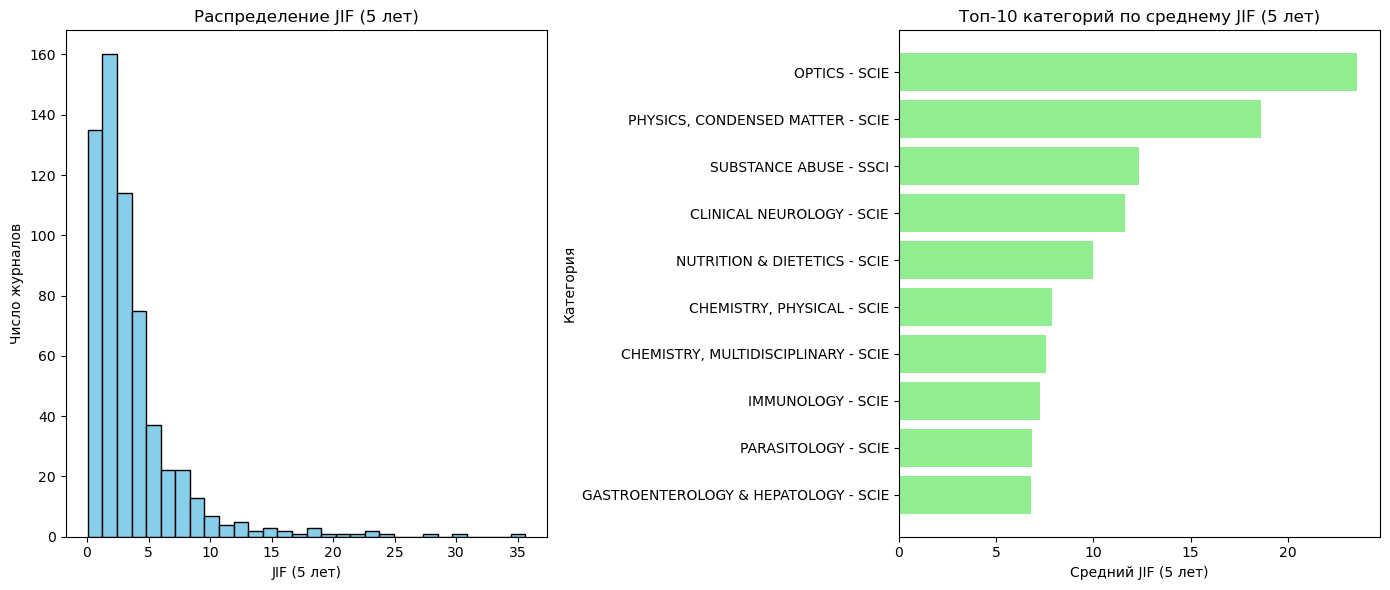

In [15]:
# Убедимся, что jif5Years в числовом формате
df['jif5Years'] = pd.to_numeric(df['jif5Years'], errors='coerce')

# Создаём фигуру с 2 графиками по горизонтали
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Гистограмма: распределение JIF (5 лет)
axs[0].hist(df['jif5Years'].dropna(), bins=30, color='skyblue', edgecolor='black')
axs[0].set_title("Распределение JIF (5 лет)")
axs[0].set_xlabel("JIF (5 лет)")
axs[0].set_ylabel("Число журналов")

# Горизонтальный bar chart: топ-10 категорий
top10 = df.groupby('category')['jif5Years'].mean().sort_values(ascending=False).head(10)
axs[1].barh(top10.index[::-1], top10.values[::-1], color='lightgreen')  # обратный порядок
axs[1].set_title("Топ-10 категорий по среднему JIF (5 лет)")
axs[1].set_xlabel("Средний JIF (5 лет)")
axs[1].set_ylabel("Категория")

# Компактное расположение
plt.tight_layout()
plt.show()



1. Как видно из графика "Распределение JIF (5 лет)", наблюдается асимметричное распределение с правым хвостом. Большинство журналов имеют JIF в пределах 1–6, а значения выше 25 встречаются редко.

2. Наиболее престижными по среднему JIF (5 лет) являются журналы из категории OPTICS.

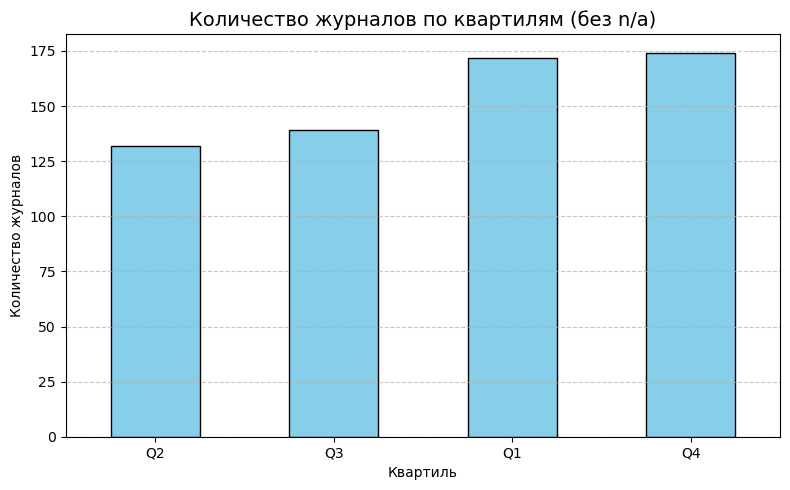

In [16]:
# Фильтрация: исключаем n/a
df_filtered = df[df['quartile'].str.lower() != 'n/a']

# Подсчёт количества журналов в каждом квартиле
quartile_counts = df_filtered['quartile'].value_counts().sort_values()

# Построение графика
plt.figure(figsize=(8, 5))
quartile_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Количество журналов по квартилям (без n/a)', fontsize=14)
plt.xlabel('Квартиль')
plt.ylabel('Количество журналов')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Больше всего журналов представленно в квартиля Q1 и Q4

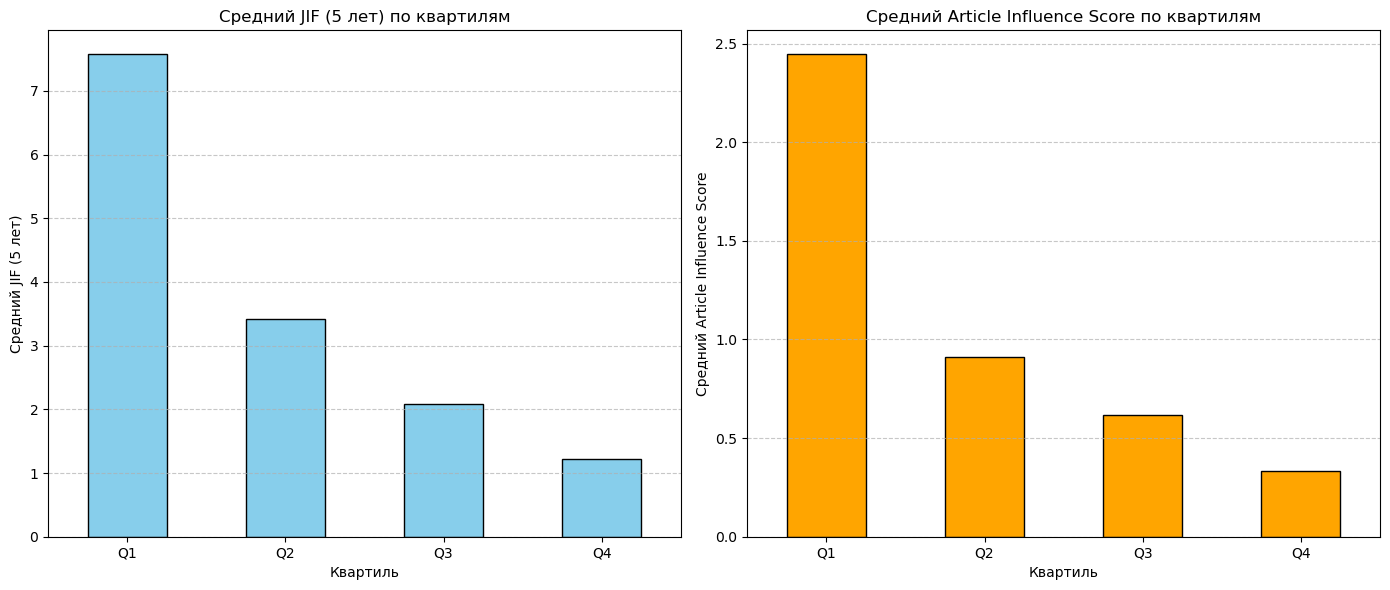

In [17]:
# Приведение числовых колонок к float
df['jif5Years'] = pd.to_numeric(df['jif5Years'], errors='coerce')
df['articleInfluenceScore'] = pd.to_numeric(df['articleInfluenceScore'], errors='coerce')

# Фильтрация: исключаем строки с квартилем 'n/a'
df_filtered = df[df['quartile'].str.lower() != 'n/a']

# Группировки
jif_means = df_filtered.groupby('quartile')['jif5Years'].mean().sort_index()
ais_means = df_filtered.groupby('quartile')['articleInfluenceScore'].mean().sort_index()

# Построение двух графиков рядом
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# График 1: jif5Years
jif_means.plot(kind='bar', color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_title('Средний JIF (5 лет) по квартилям')
axes[0].set_xlabel('Квартиль')
axes[0].set_ylabel('Средний JIF (5 лет)')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].tick_params(axis='x', rotation=0)

# График 2: Article Influence Score
ais_means.plot(kind='bar', color='orange', edgecolor='black', ax=axes[1])
axes[1].set_title('Средний Article Influence Score по квартилям')
axes[1].set_xlabel('Квартиль')
axes[1].set_ylabel('Средний Article Influence Score')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

Из представленных графиков видно, что средние значения JIF (5 лет) и Article Influence Score возрастают по мере перехода от более низких к более высоким квартилям. Это свидетельствует о том, что журналы из Q1, как правило, обладают наибольшим влиянием и престижем.

# IV. Журналы

1. Post-Soviet Affairs — хороший журнал:

- Высокий уровень цитируемости: JCI = 1.66 в 2023 году.

- Несмотря на отсутствие прозрачного рецензирования, наблюдается высокая активность рецензентов.

- Публикации бесплатны (нет платы за размещение статей).

2. PLOS ONE — достойный журнал, если у автора есть 2 382 доллара на оплату публикации.

3. Sustainability — не рекомендую для публикации:

- Высокая стоимость публикации — 2 200 швейцарских франков.

- В 2023 году JCI составил 0.68, что ниже среднего.

- Уровень прозрачности исследований оставляет желать лучшего.

4. ΕΙΝΑΙ: Философия. Религия. Культура — не рекомендую для публикации:

- Журнал не входит в список ВАК.

- Не индексируется в РИНЦ, отсутствует DOI.

5. Молодой ученый — не рекомендую для публикации:

- Журнал не входит в список ВАК.

- Не индексируется в РИНЦ, отсутствует DOI.

- Выходит 52 раза в год, что может указывать на массовый характер публикаций.

